# H$_\text{2}$-Companion 

Diese .ipynb Datei, enthält den Code für die Implementierung von Methoden aus *Rhodium*. 


Author: José Heinz Santos B.Sc.

* Erstmal werden die notwendige *Packages* und *Libraries* aufgerufen. 

In [4]:
import numpy as np   # Für die mathematische Grundlagen, die benutzt werden.
import matplotlib.pyplot as plt   # Für die Schaubilder
import tensorflow as tf   # Für die Implementierung von Machine Learning und Tensorflow
import rhodium    # Rhobust Decision Making
import scipy.signal as sig   # Für die Signalverarbeitung
from rhodium import *   # Mehr Rhodium 
import networkx as nx   # Mehr zu Tensorflow
from rhodium import Model, sample_lhs, update, evaluate, sa, DataSet   #...Rhodium
import pandas as pd # Für die Excel Tabellen mit den Preisen

* Jetzt wird eine Prognose der Strompreise, der Wasserstoffpreise und der Benzinpreise für den Wasserstofftransport mittels der Generierung von mikroökonomischen Funktionen erstellt. Anschließend werden zur besseren Verständlichkeit dieser Funktionen Tools aus dem Bereich Deep Learning oder Machine Learning eingesetzt.

### Diesel Prices

   Year   Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6
0  2008   97.61         NaN         NaN         NaN         NaN         NaN
1  2009   82.63         NaN         NaN         NaN         NaN         NaN
2  2010   88.87         NaN         NaN         NaN         NaN         NaN
3  2011  104.79         NaN         NaN         NaN         NaN         NaN
4  2012  116.36         NaN         NaN         NaN         NaN         NaN


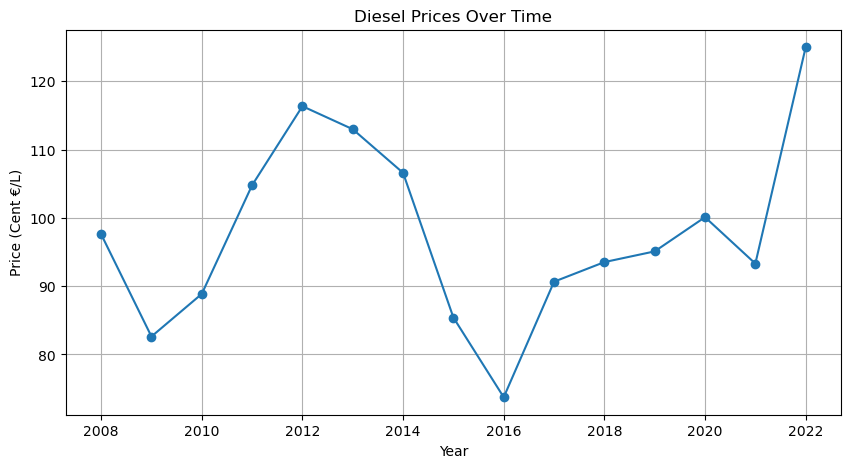

In [7]:

# Excel File hochladen
file_path = 'diesel-Table 1.csv'
diesel_data = pd.read_csv(file_path, delimiter=';')

# Erste Daten zeigen
print(diesel_data.head())

# Limpiar informacion
diesel_data = diesel_data[['Year', 'Price']]

diesel_data['Year'] = diesel_data['Year'].astype(float)
diesel_data['Price'] = diesel_data['Price'].astype(float)

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(diesel_data['Year'], diesel_data['Price'], marker='o')

plt.title('Diesel Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Cent €/L)')
plt.grid(True)

#Zeigen
plt.show()

In [8]:
diesel_data

,Year,Price
0,2008.0,97.61
1,2009.0,82.63
2,2010.0,88.87
3,2011.0,104.79
4,2012.0,116.36
5,2013.0,112.99
6,2014.0,106.60
7,2015.0,85.41
8,2016.0,73.74
9,2017.0,90.66


### Electricity Prices

     Year  Price  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  Unnamed: 6
0  2008.0   9.59         NaN         NaN         NaN         NaN         NaN
1  2008.5   9.57         NaN         NaN         NaN         NaN         NaN
2  2009.0  10.02         NaN         NaN         NaN         NaN         NaN
3  2009.5  10.07         NaN         NaN         NaN         NaN         NaN
4  2010.0   9.93         NaN         NaN         NaN         NaN         NaN


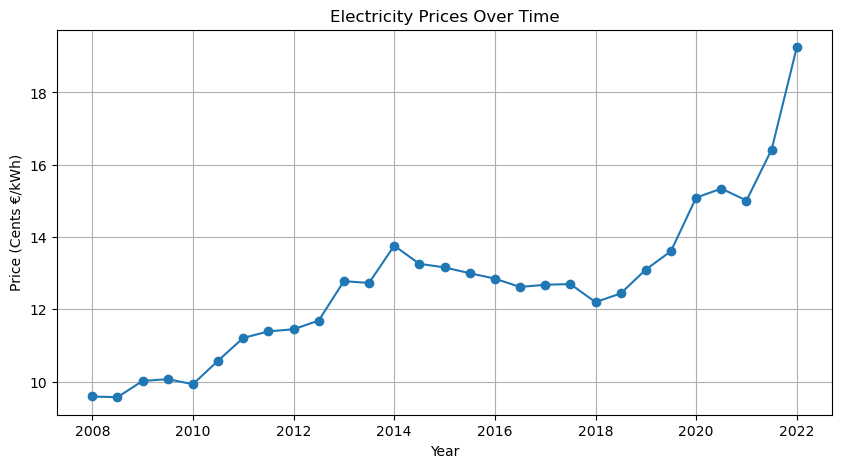

In [10]:

file_path = 'electricity-Table 1.csv'
electricity_data = pd.read_csv(file_path, delimiter=';')


print(electricity_data.head())


electricity_data = electricity_data[['Year', 'Price']]


electricity_data['Year'] = electricity_data['Year'].astype(float)
electricity_data['Price'] = electricity_data['Price'].astype(float)


plt.figure(figsize=(10, 5))
plt.plot(electricity_data['Year'], electricity_data['Price'], marker='o')


plt.title('Electricity Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Price (Cents €/kWh)')
plt.grid(True)


plt.show()

In [11]:
electricity_data

,Year,Price
0,2008.0,9.59
1,2008.5,9.57
2,2009.0,10.02
3,2009.5,10.07
4,2010.0,9.93
5,2010.5,10.58
6,2011.0,11.21
7,2011.5,11.39
8,2012.0,11.45
9,2012.5,11.69


Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 - 1s - 34ms/step - loss: 0.0361
Epoch 2/100
16/16 - 0s - 1ms/step - loss: 0.0185
Epoch 3/100
16/16 - 0s - 1ms/step - loss: 0.0109
Epoch 4/100
16/16 - 0s - 1ms/step - loss: 0.0073
Epoch 5/100
16/16 - 0s - 1ms/step - loss: 0.0077
Epoch 6/100
16/16 - 0s - 1ms/step - loss: 0.0072
Epoch 7/100
16/16 - 0s - 1ms/step - loss: 0.0064
Epoch 8/100
16/16 - 0s - 1ms/step - loss: 0.0065
Epoch 9/100
16/16 - 0s - 1ms/step - loss: 0.0077
Epoch 10/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 11/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 12/100
16/16 - 0s - 1ms/step - loss: 0.0069
Epoch 13/100
16/16 - 0s - 1ms/step - loss: 0.0068
Epoch 14/100
16/16 - 0s - 1ms/step - loss: 0.0062
Epoch 15/100
16/16 - 0s - 1ms/step - loss: 0.0062
Epoch 16/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 17/100
16/16 - 0s - 1ms/step - loss: 0.0062
Epoch 18/100
16/16 - 0s - 1ms/step - loss: 0.0066
Epoch 19/100
16/16 - 0s - 1ms/step - loss: 0.0061
Epoch 20/100
16/16 - 0s - 1ms/step - loss: 0.0057
Epoch 21/100
16/16 -

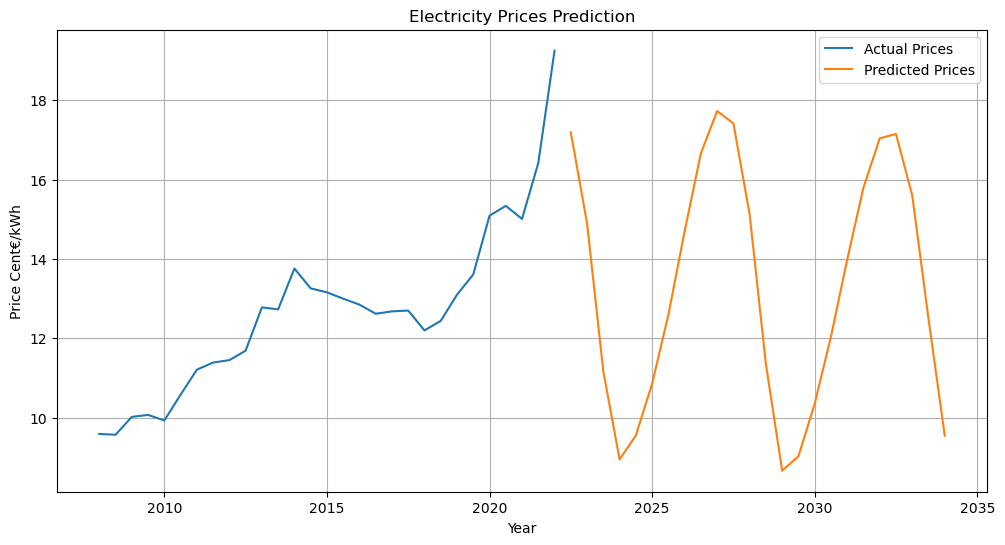

      Year  Predicted Price
0   2022.5        17.193499
1   2023.0        14.898429
2   2023.5        11.167781
3   2024.0         8.949328
4   2024.5         9.551362
5   2025.0        10.855615
6   2025.5        12.591775
7   2026.0        14.697843
8   2026.5        16.663115
9   2027.0        17.729843
10  2027.5        17.420948
11  2028.0        15.120096
12  2028.5        11.349353
13  2029.0         8.662982
14  2029.5         9.028157
15  2030.0        10.350290
16  2030.5        12.043309
17  2031.0        13.985748
18  2031.5        15.799640
19  2032.0        17.041183
20  2032.5        17.152338
21  2033.0        15.602240
22  2033.5        12.494036
23  2034.0         9.545913


In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

# Data nehmen (aus Excel)
data = {
    'Year': electricity_data['Year'],
    'Price': electricity_data['Price']
}
df = pd.DataFrame(data)

# Data bearbeiten
scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

# Sequence erstellen
def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 9
X, y = create_sequences(df['Price'].values, sequence_length)

# Data bearbeiten
X = X.reshape((X.shape[0], X.shape[1], 1))

# Splitten
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train 
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Prognose
predictions = []
current_input = df['Price'].values[-sequence_length:].reshape((1, sequence_length, 1))

for _ in range(24):  # Predict for 12 years ahead (2 half-year steps per year)
    next_price = model.predict(current_input)[0][0]
    predictions.append(next_price)
    next_price_reshaped = np.array(next_price).reshape((1, 1, 1))
    current_input = np.append(current_input[:, 1:, :], next_price_reshaped, axis=1)

# Inverse Transformation
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_years = np.arange(2022.5, 2034.5, 0.5)


print(f"Length of future_years: {len(future_years)}")
print(f"Length of predictions: {len(predictions)}")


if len(future_years) == len(predictions):
    predictions_df_el = pd.DataFrame({'Year': future_years, 'Predicted Price': predictions.flatten()})

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], scaler.inverse_transform(df['Price'].values.reshape(-1, 1)), label='Actual Prices')
    plt.plot(predictions_df_el['Year'], predictions_df_el['Predicted Price'], label='Predicted Prices')
    plt.xlabel('Year')
    plt.ylabel('Price Cent€/kWh')
    plt.title('Electricity Prices Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(predictions_df_el)
else:
    print("Lengths of future_years and predictions do not match.")

Epoch 1/100


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


9/9 - 1s - 65ms/step - loss: 0.2366
Epoch 2/100
9/9 - 0s - 1ms/step - loss: 0.1640
Epoch 3/100
9/9 - 0s - 1ms/step - loss: 0.1056
Epoch 4/100
9/9 - 0s - 1ms/step - loss: 0.0818
Epoch 5/100
9/9 - 0s - 1ms/step - loss: 0.0875
Epoch 6/100
9/9 - 0s - 1ms/step - loss: 0.0865
Epoch 7/100
9/9 - 0s - 1ms/step - loss: 0.0821
Epoch 8/100
9/9 - 0s - 1ms/step - loss: 0.0843
Epoch 9/100
9/9 - 0s - 1ms/step - loss: 0.0770
Epoch 10/100
9/9 - 0s - 1ms/step - loss: 0.0811
Epoch 11/100
9/9 - 0s - 1ms/step - loss: 0.0770
Epoch 12/100
9/9 - 0s - 1ms/step - loss: 0.0769
Epoch 13/100
9/9 - 0s - 1ms/step - loss: 0.0740
Epoch 14/100
9/9 - 0s - 1ms/step - loss: 0.0758
Epoch 15/100
9/9 - 0s - 1ms/step - loss: 0.0742
Epoch 16/100
9/9 - 0s - 1ms/step - loss: 0.0724
Epoch 17/100
9/9 - 0s - 1ms/step - loss: 0.0703
Epoch 18/100
9/9 - 0s - 1ms/step - loss: 0.0697
Epoch 19/100
9/9 - 0s - 1ms/step - loss: 0.0679
Epoch 20/100
9/9 - 0s - 1ms/step - loss: 0.0677
Epoch 21/100
9/9 - 0s - 1ms/step - loss: 0.0678
Epoch 22/100

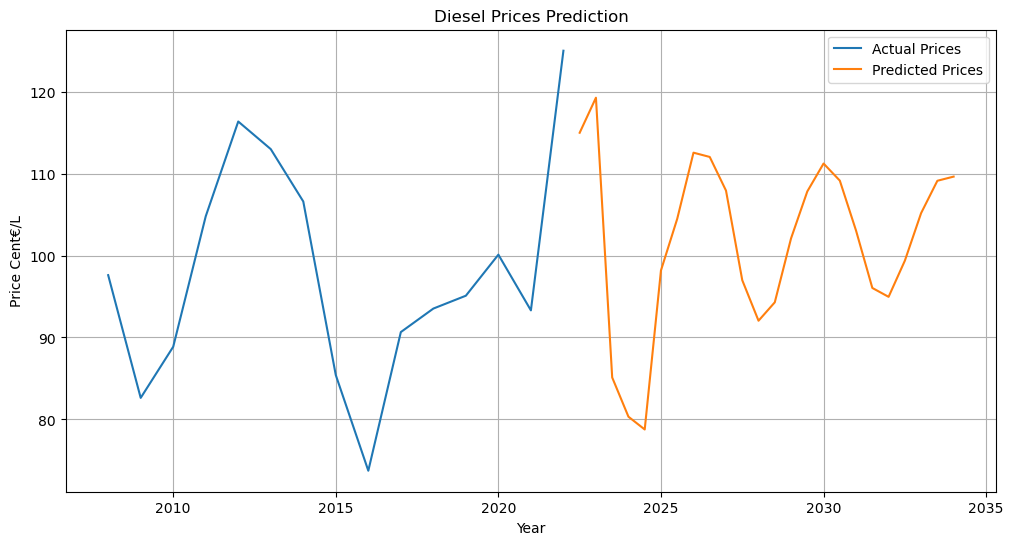

      Year  Predicted Price
0   2022.5       114.987404
1   2023.0       119.265625
2   2023.5        85.119026
3   2024.0        80.331520
4   2024.5        78.773232
5   2025.0        98.191193
6   2025.5       104.488487
7   2026.0       112.557045
8   2026.5       112.035362
9   2027.0       107.926132
10  2027.5        96.990311
11  2028.0        92.047226
12  2028.5        94.292763
13  2029.0       102.094780
14  2029.5       107.826408
15  2030.0       111.233223
16  2030.5       109.146484
17  2031.0       103.033470
18  2031.5        96.045303
19  2032.0        94.962547
20  2032.5        99.373672
21  2033.0       105.180267
22  2033.5       109.127968
23  2034.0       109.635765


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler

data = {
    'Year': diesel_data['Year'],
    'Price': diesel_data['Price']
}
df = pd.DataFrame(data)

scaler = MinMaxScaler(feature_range=(0, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))

def create_sequences(data, sequence_length):
    xs = []
    ys = []
    for i in range(len(data) - sequence_length):
        x = data[i:i+sequence_length]
        y = data[i+sequence_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

sequence_length = 3
X, y = create_sequences(df['Price'].values, sequence_length)

X = X.reshape((X.shape[0], X.shape[1], 1))

split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

predictions = []
current_input = df['Price'].values[-sequence_length:].reshape((1, sequence_length, 1))

for _ in range(24):  # Predict for 12 years ahead (2 half-year steps per year)
    next_price = model.predict(current_input)[0][0]
    predictions.append(next_price)
    next_price_reshaped = np.array(next_price).reshape((1, 1, 1))
    current_input = np.append(current_input[:, 1:, :], next_price_reshaped, axis=1)

predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

future_years = np.arange(2022.5, 2034.5, 0.5)

print(f"Length of future_years: {len(future_years)}")
print(f"Length of predictions: {len(predictions)}")

if len(future_years) == len(predictions):
    predictions_df_diesel = pd.DataFrame({'Year': future_years, 'Predicted Price': predictions.flatten()})

    plt.figure(figsize=(12, 6))
    plt.plot(df['Year'], scaler.inverse_transform(df['Price'].values.reshape(-1, 1)), label='Actual Prices')
    plt.plot(predictions_df_diesel['Year'], predictions_df_diesel['Predicted Price'], label='Predicted Prices')
    plt.xlabel('Year')
    plt.ylabel('Price Cent€/L')
    plt.title('Diesel Prices Prediction')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(predictions_df_diesel)
else:
    print("Lengths of future_years and predictions do not match.")

### Hydrogen Prices (Hier kein Tensorflow nötig) 

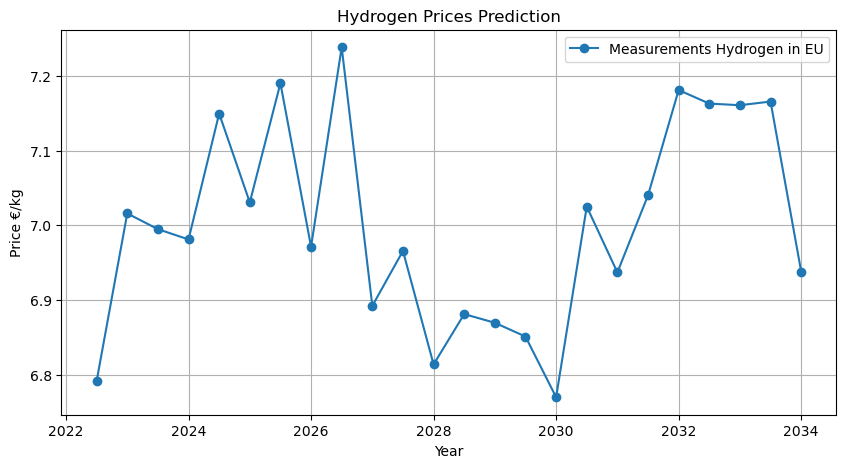

In [15]:
def hydrogen_prices(
    N_samples_h: int = 24,
    noise_sig_h: float = 0.1,
    noise_explosion_h: float = 0.7,
    explosion_year_sample_h: int = 230 # This is year 2020 in x[explosion_year_sample] = 2020
                      )->float:
    # Data preparation
    x = np.linspace(2022.5, 2034.0, N_samples_h, dtype=np.float32)
    y = 7+((x-2023)/40)*np.sin(x-1) + noise_sig_h * np.random.randn(N_samples_h).astype(np.float32)
    y[explosion_year_sample_h:explosion_year_sample_h+25] = (13+
                                            ((x[explosion_year_sample_h:explosion_year_sample_h+25]-2023)/40)*
                                             np.sin(x[explosion_year_sample_h:explosion_year_sample_h+25]-1) + 
         noise_explosion_h)
    y_true = 13+((x-2023)/40)*np.sin(x-1)
    
    return (x,y,y_true)

    
def plot_hydrogen_prices(
    x: float = 0, 
    y: float = 0, 
    y_true: float = 0
                            ): 
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, marker='o')
    #plt.plot(x, y_true)
    plt.legend(["Measurements Hydrogen in EU", "Ground truth"])
    #plt.show()
    plt.xlabel('Year')
    plt.ylabel('Price €/kg')
    plt.title('Hydrogen Prices Prediction')
    plt.grid(True)
    

(x_h,y_h,y_true_h) = hydrogen_prices()
plot_hydrogen_prices(x_h,y_h,y_true_h)

* Jetzt wird die Funktion des NPV (Net Present Value) definiert.

In [118]:
import numpy_financial as npf #für NPV

def prediction_h2(
    h_price: np.ndarray,
    years: np.ndarray,
    volatility_year_h2: int = 2026,
    volatility_coeff_h2: float = 1.3 
                 )->float:
    h_prices = h_price.copy()
    location_array = np.where(years == volatility_year_h2)[0]    
    h_prices[location_array] = volatility_coeff_h2*h_prices[location_array]
    
    return h_prices


def prediction_diesel(
    diesel_price: np.ndarray,
    years: np.ndarray,
    volatility_year_diesel: int = 2027,
    volatility_coeff_diesel: float = 1.3 
                 )->float:
    diesel_prices = diesel_price.copy()
    location_array = np.where(years == volatility_year_diesel)[0]    
    diesel_prices[location_array] = volatility_coeff_diesel*diesel_prices[location_array]
    
    return diesel_prices


def prediction_electricity(
    elec_price: np.ndarray,
    years: np.ndarray,
    volatility_year_elec: int = 2025,
    volatility_coeff_elec: float = 1.5 
                 )->float:
    elec_prices = elec_price.copy() 
    location_array = np.where(years == volatility_year_elec)[0]    
    elec_prices[location_array] = volatility_coeff_elec*elec_prices[location_array]
    
    return elec_prices

def electrolysis_win(
    electricity_prices: np.ndarray, #[cent EURO/kWh] 
    h_price: np.ndarray, #[EURO/kg]
    #diesel_prices: np.ndarray, #[cent EURO/L] 
    t_electro: float = 8000, #[h]
    eta_h2: float = 0.99 #Wirkungsgrad Elektrolyseur [kWh/kg]
    #rate: float = 0.027 #Rate []
                    )->float:
    win = []
    loss = []
    
    for i in range(len(electricity_prices)):
        loss.append((electricity_prices[i]/100)*(t_electro))
        
    for i in range(len(h_price)):
        win.append(h_price[i] * t_electro * (1 / eta_h2))
        
    win = np.array(win)
    loss = np.array(loss)
    ertrag = win-loss
    #NPV = npf.npv(rate, ertrag)
    
    return ertrag


def npv(
    #h_price,
    #elec_price: np.ndarray,
    #diesel_price: np.ndarray,
    #years: np.ndarray,
    volatility_year_h2: int = 2026,
    volatility_coeff_h2: float = 1.3,
    #years: np.ndarray,
    volatility_year_diesel: int = 2027,
    volatility_coeff_diesel: float = 1.3,
    #years: np.ndarray,
    volatility_year_elec: int = 2025,
    volatility_coeff_elec: float = 1.5,
    #electricity_prices: np.ndarray, #[cent EURO/kWh] 
    #h_price: np.ndarray, #[EURO/kg]
    #diesel_prices: np.ndarray, #[cent EURO/L] 
    t_electro: float = 8000, #[h]
    eta_h2: float = 0.99, #Wirkungsgrad Elektrolyseur [kWh/kg]
    rate: float = 0.027 #Rate []
        )->float: 
    
    # Preise Berechnen
    price_h2 = prediction_h2(y_h,x_h,volatility_year_h2,volatility_coeff_h2)
    price_diesel = prediction_diesel(predictions_df_diesel['Predicted Price'],
                                     x_h,volatility_year_diesel,volatility_coeff_diesel)
    price_elec = prediction_electricity(predictions_df_el['Predicted Price'],
                                        x_h,volatility_year_elec,volatility_coeff_elec)
    
    # Gewinn Elektrolyseur: 
    ertrag_vector = electrolysis_win(price_elec,price_h2,t_electro,eta_h2)
    
    #npv Berechnen:
    max_ertrag = np.max(ertrag_vector)
    min_ertrag = np.min(ertrag_vector)
    npv = npf.npv(rate, ertrag_vector)
    
    return (npv,max_ertrag,min_ertrag)

In [122]:
npv1,ertrag_max,ertrag_min = npv()
#npv1
#ertrag_min
ertrag_max

72056.81949576946

## Model für die NPV

In [127]:
## Now we define the model!
def return_model()-> Model:
    model = Model(npv)
    
    model.parameters = [
        Parameter("volatility_year_h2"),
        Parameter("volatility_coeff_h2"),
        Parameter("volatility_year_diesel"),
        Parameter("volatility_coeff_diesel"),
        Parameter("volatility_year_elec"),
        Parameter("volatility_coeff_elec"),
        Parameter("t_electro"),
        Parameter("eta_h2"),
        Parameter("rate")]
    
    model.responses = [
        Response("npv", Response.MAXIMIZE),
        Response("max_ertrag", Response.MAXIMIZE),
        Response("min_ertrag", Response.MAXIMIZE)]
    
    #model.constraints = [Constraint("b >= 0.95")]
    
    model.uncertainties = [IntegerUncertainty("volatility_year_h2", 2023, 2033),
                           UniformUncertainty("volatility_coeff_h2", 1.1, 5.0),
                           IntegerUncertainty("volatility_year_diesel", 2023, 2033),
                           UniformUncertainty("volatility_coeff_diesel", 1.1, 5.0),
                           IntegerUncertainty("volatility_year_elec", 2023, 2033),
                           UniformUncertainty("volatility_coeff_elec", 1.1, 5.0),
                           UniformUncertainty("eta_h2",0.9,1.0),
                           UniformUncertainty("rate",0.02,0.05)
                          ]
    
    model.levers = [
                    RealLever("t_electro", 6000, 8400, length = 1)
                    ]
    
    return model


model = return_model();

In [147]:
# 100 SOWs/futures are evaluated. Can be reduced for fast model runs.
SOWs = sample_lhs(model, 10000)
model_results = evaluate(model, SOWs)

In [142]:
output_optimization = optimize(model, "NSGAII", 1000)
output_optimization

[OrderedDict([('t_electro', 8399.999994571426),
              ('npv', 1061005.5117030144),
              ('max_ertrag', 75659.66042166222),
              ('min_ertrag', 56178.51170810666)])]

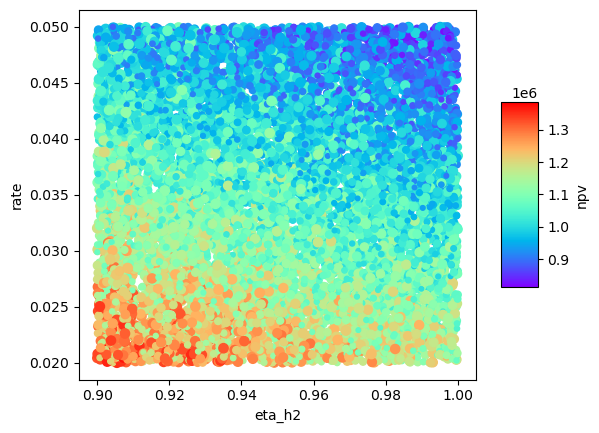

In [149]:
fig1 = scatter2d(model, model_results, x="eta_h2", y="rate", c = "npv")

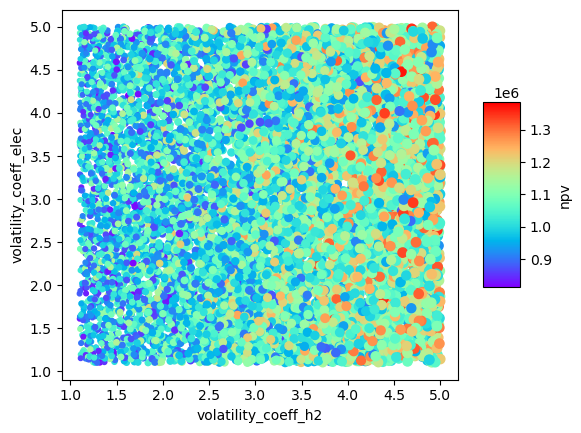

In [159]:
fig2 = scatter2d(model, model_results, x="volatility_coeff_h2", y="volatility_coeff_elec", c = "npv")

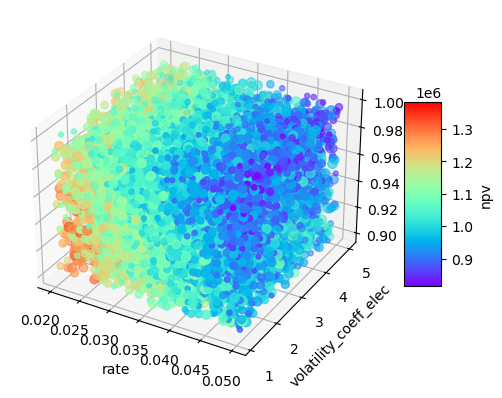

In [161]:
fig3 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "npv")

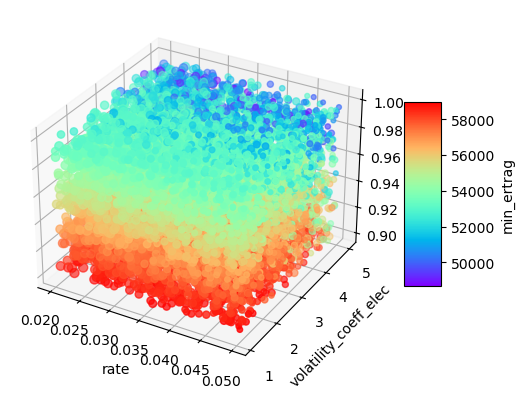

In [167]:
fig4 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "min_ertrag")

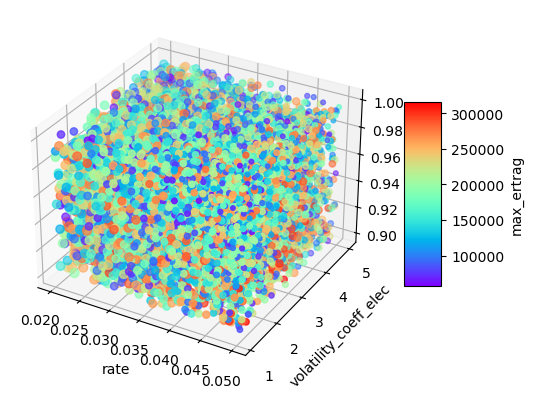

In [169]:
fig5 = scatter3d(model, model_results, x="rate", y="volatility_coeff_elec", z = "eta_h2", c = "max_ertrag")

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


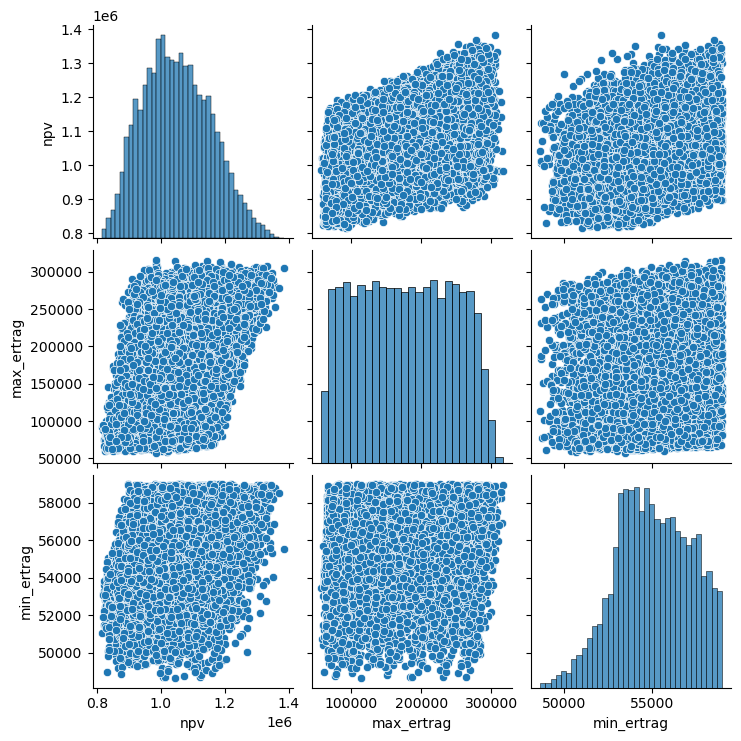

In [172]:
fig6 = pairs(model, model_results)

/Users/joseheinz/Documents/Arbeit/Fraunhofer/rhodium/Rhodium/rhodium/plot.py:811: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df_min[i] if model.responses[df.columns.values[i]].dir == Response.MINIMIZE else df_max[i]
/Users/joseheinz/Documents/Arbeit/Fraunhofer/rhodium/Rhodium/rhodium/plot.py:827: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  value = df_max[i] if model.responses[df.columns.values[i]].dir == Response.MINIMIZE else df_min[i]


AttributeError: 'Colorbar' object has no attribute 'set_clim'

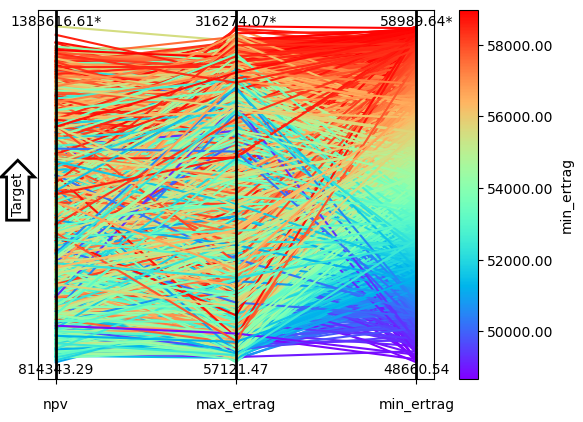

In [175]:
fig7 = parallel_coordinates(model,model_results, colormap="rainbow", target="top")